In [1]:
#Import required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout
import matplotlib.pyplot as plt
from matplotlib.image import imread

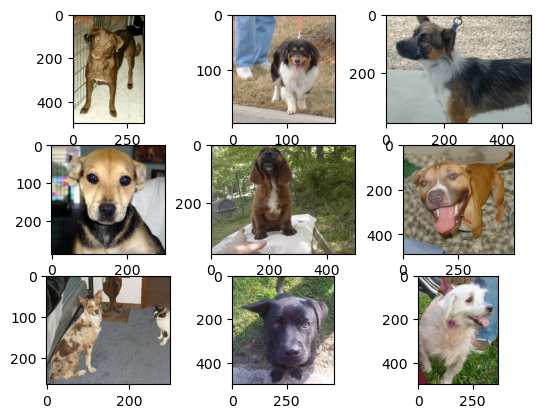

In [2]:
#Lets import the data and print some images
folder='C:/Users/lenovo/Jupyter Data Science/Data Science/Deep Learning/Pet class CNN/data/train/dogs/'
for i in range(9):
    plt.subplot(330+1+i)
    filename=folder+str(i+1)+'.jpg'
    image=imread(filename)
    plt.imshow(image)
plt.show()

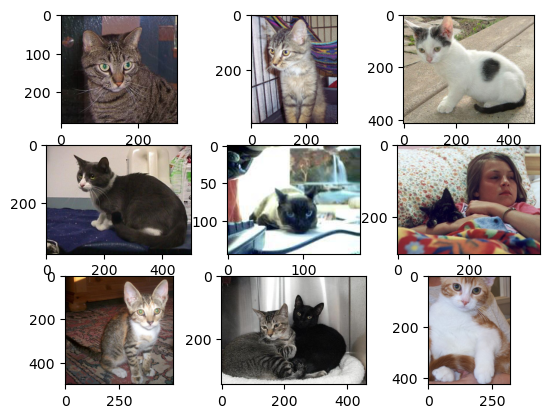

In [3]:
Folder='C:/Users/lenovo/Jupyter Data Science/Data Science/Deep Learning/Pet class CNN/data/train/cats/'
for i in range(9):
  plt.subplot(330+1+i)
  filename=Folder+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)

plt.show()

### Lets do Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

### Create training and testing set

In [6]:
train_set=train_datagen.flow_from_directory('C:/Users/lenovo/Jupyter Data Science/Data Science/Deep Learning/Pet class CNN/data/train/',
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='binary')
test_set=test_datagen.flow_from_directory('C:/Users/lenovo/Jupyter Data Science/Data Science/Deep Learning/Pet class CNN/data/test/',
                                         target_size=(64,64),
                                         batch_size=32,
                                         class_mode='binary')

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [7]:
train_set.class_indices

{'cats': 0, 'dogs': 1}

## Create CNN Architecture

In [13]:
model=Sequential()
#First CNN layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

#second layer
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))

# ANN layer
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.4))

#output layer
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [15]:
#For the training step, define the loss function and minimize it
from tensorflow.keras.optimizers import SGD
sgd=SGD(lr=0.001)

In [16]:
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [17]:
result=model.fit(train_set,validation_data=test_set,epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 885ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6918 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 1s 656ms/step - loss: 0.6994 - accuracy: 0.5000 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 1s 546ms/step - loss: 0.6894 - accuracy: 0.5500 - val_loss: 0.6882 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 1s 292ms/step - loss: 0.6973 - accuracy: 0.4000 - val_loss: 0.6889 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 1s 602ms/step - loss: 0.7038 - accuracy: 0.5250 - val_loss: 0.6880 - val_accuracy: 0.5500
Epoch 6/100
2/2 [==============================] - 1s 661ms/step - loss: 0.6886 - accuracy: 0.5750 - val_loss: 0.6862 - val_accuracy: 0.6000
Epoch 7/100
2/2 [==============================] - 1s 652ms/step - loss: 0.7009 - accuracy: 0.5000 - val_loss: 0.6870 - val_accuracy: 0.5500
Epoch 8/100
2

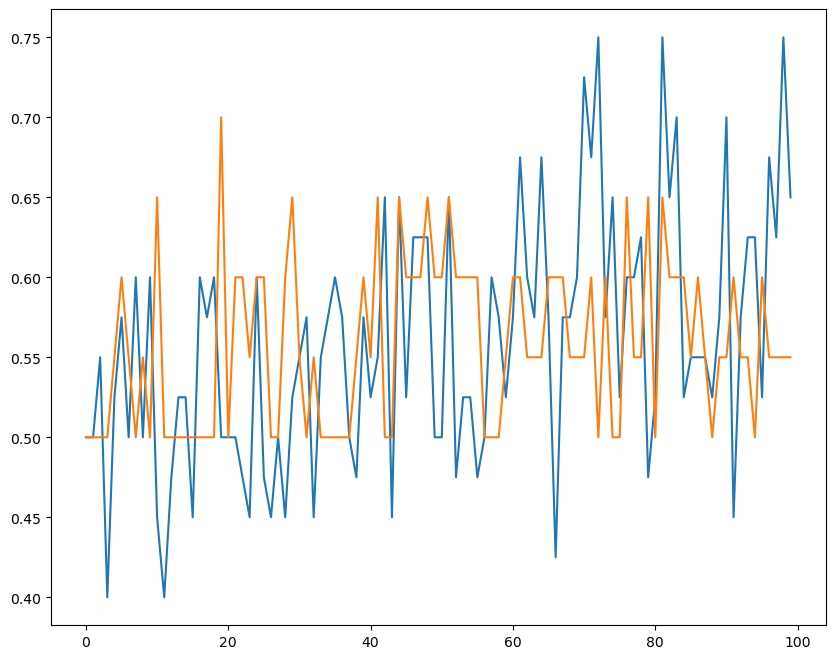

In [20]:
#Plotting accuracy graph
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.show()

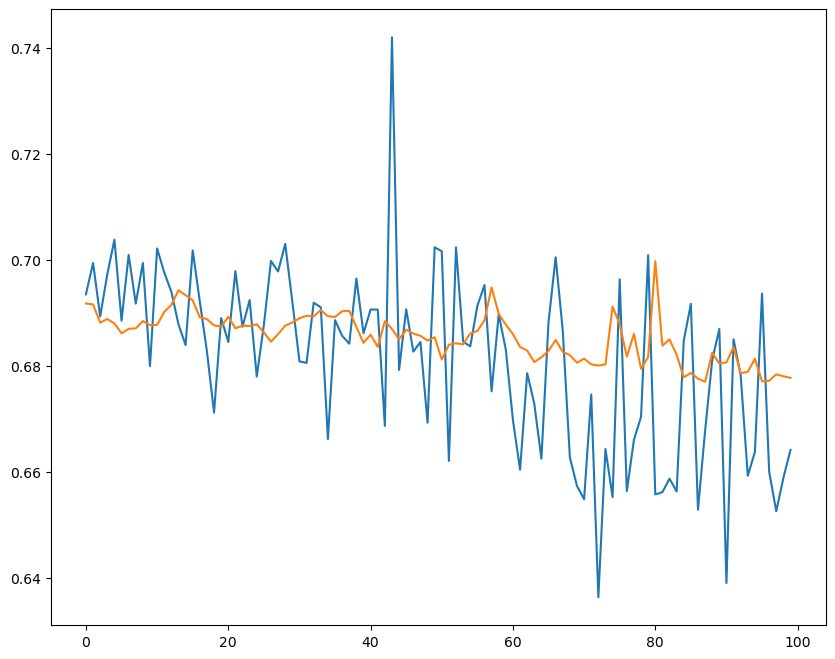

In [21]:
#Plotting loss graph
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.show()

In [22]:
result1=model.fit(train_set,validation_data=test_set,epochs=200)

Epoch 1/200
2/2 [==============================] - 1s 362ms/step - loss: 0.6687 - accuracy: 0.5750 - val_loss: 0.6813 - val_accuracy: 0.5500
Epoch 2/200
2/2 [==============================] - 1s 206ms/step - loss: 0.6616 - accuracy: 0.5750 - val_loss: 0.6788 - val_accuracy: 0.6500
Epoch 3/200
2/2 [==============================] - 1s 226ms/step - loss: 0.6313 - accuracy: 0.7500 - val_loss: 0.6771 - val_accuracy: 0.5000
Epoch 4/200
2/2 [==============================] - 1s 532ms/step - loss: 0.6639 - accuracy: 0.6000 - val_loss: 0.6755 - val_accuracy: 0.6000
Epoch 5/200
2/2 [==============================] - 1s 233ms/step - loss: 0.6345 - accuracy: 0.7000 - val_loss: 0.6790 - val_accuracy: 0.5500
Epoch 6/200
2/2 [==============================] - 1s 532ms/step - loss: 0.6708 - accuracy: 0.5500 - val_loss: 0.6772 - val_accuracy: 0.5500
Epoch 7/200
2/2 [==============================] - 1s 248ms/step - loss: 0.6600 - accuracy: 0.6000 - val_loss: 0.6794 - val_accuracy: 0.6500
Epoch 8/200
2

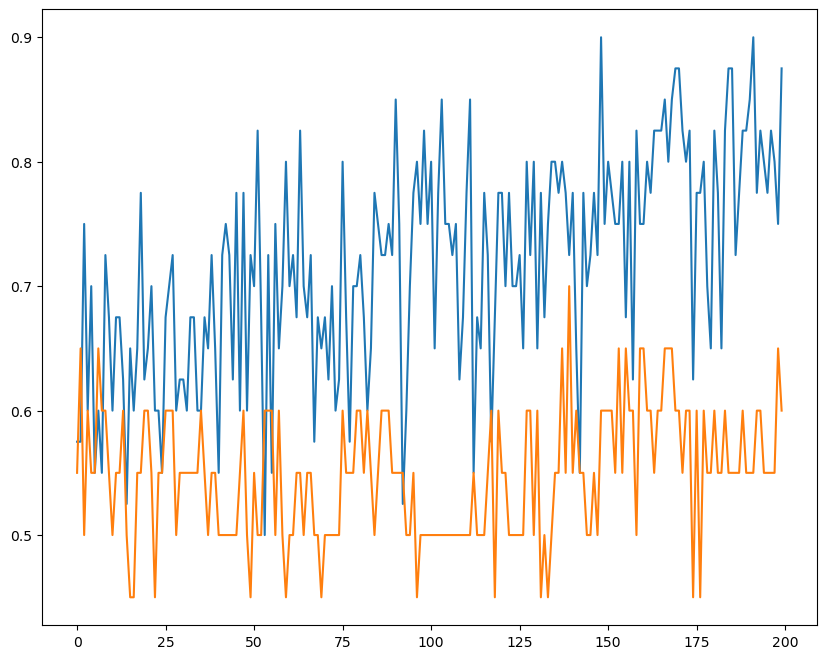

In [25]:
#Plotting accuracy graph
plt.figure(figsize=(10,8))
plt.plot(result1.history['accuracy'])
plt.plot(result1.history['val_accuracy'])
plt.show()

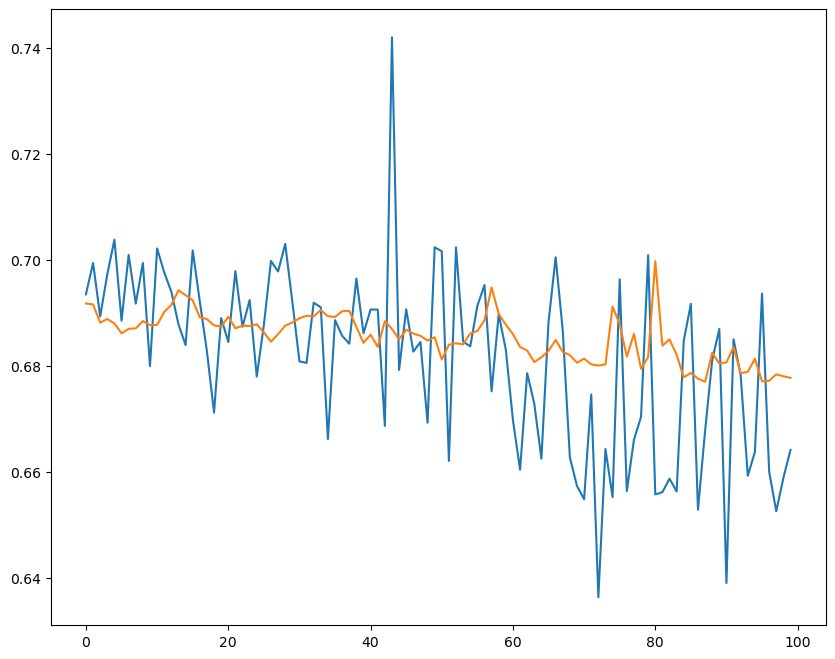

In [26]:
#Plotting loss graph
plt.figure(figsize=(10,8))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.show()

In [27]:
result2=model.fit(train_set,validation_data=test_set,epochs=300)

Epoch 1/300
2/2 [==============================] - 1s 616ms/step - loss: 0.5149 - accuracy: 0.7250 - val_loss: 0.6537 - val_accuracy: 0.5000
Epoch 2/300
2/2 [==============================] - 1s 218ms/step - loss: 0.4020 - accuracy: 0.8500 - val_loss: 0.6324 - val_accuracy: 0.5500
Epoch 3/300
2/2 [==============================] - 1s 532ms/step - loss: 0.4837 - accuracy: 0.7250 - val_loss: 0.6303 - val_accuracy: 0.6000
Epoch 4/300
2/2 [==============================] - 1s 488ms/step - loss: 0.4547 - accuracy: 0.8750 - val_loss: 0.6117 - val_accuracy: 0.6000
Epoch 5/300
2/2 [==============================] - 1s 214ms/step - loss: 0.4767 - accuracy: 0.7750 - val_loss: 0.6636 - val_accuracy: 0.6500
Epoch 6/300
2/2 [==============================] - 1s 543ms/step - loss: 0.3650 - accuracy: 0.9000 - val_loss: 0.5895 - val_accuracy: 0.7000
Epoch 7/300
2/2 [==============================] - 1s 231ms/step - loss: 0.3744 - accuracy: 0.9250 - val_loss: 0.6169 - val_accuracy: 0.7500
Epoch 8/300
2

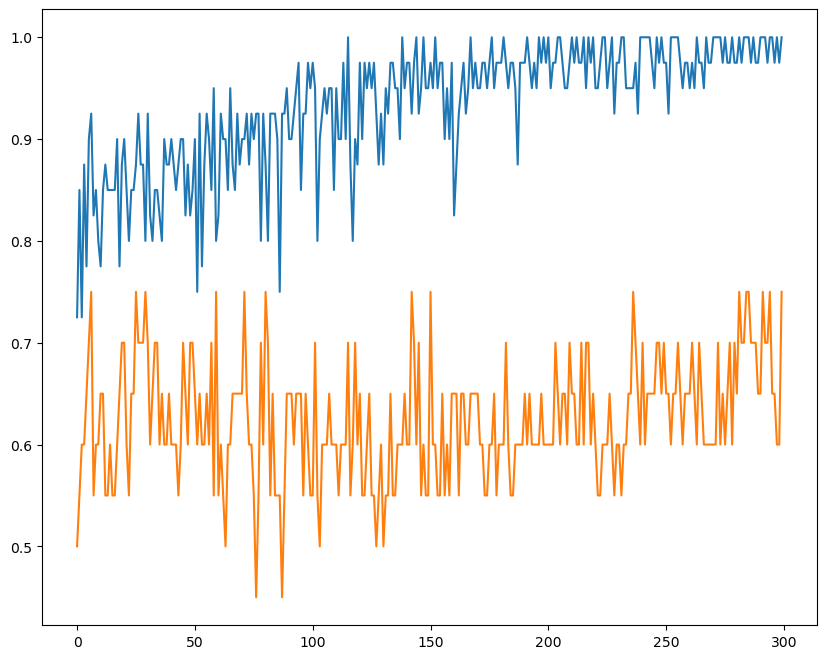

In [28]:
#Plotting accuracy graph
plt.figure(figsize=(10,8))
plt.plot(result2.history['accuracy'])
plt.plot(result2.history['val_accuracy'])
plt.show()

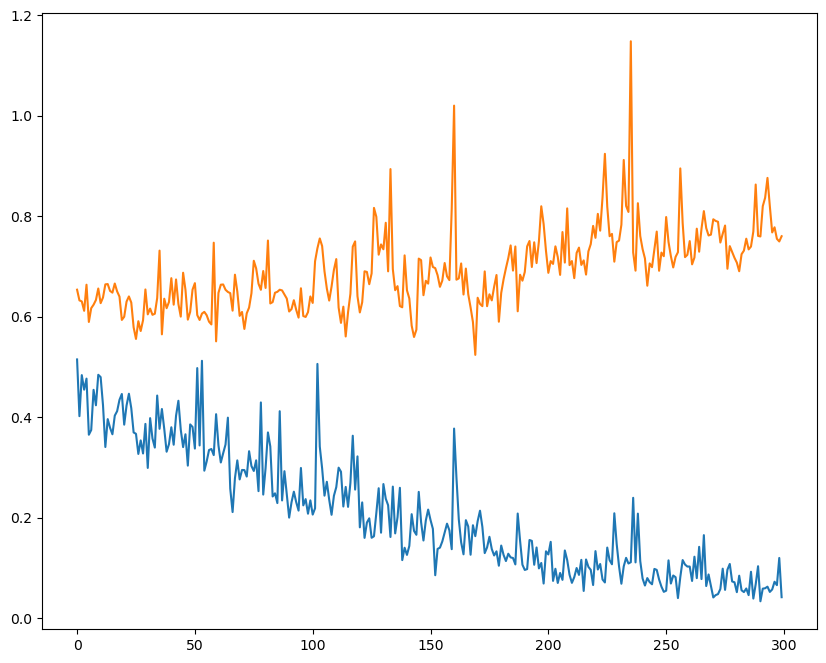

In [29]:
#Plotting loss graph
plt.figure(figsize=(10,8))
plt.plot(result2.history['loss'])
plt.plot(result2.history['val_loss'])
plt.show()

In [36]:
model.evaluate(test_set)

1/1 [==============================] - 0s 153ms/step - loss: 0.7601 - accuracy: 0.7500


[0.7601005434989929, 0.75]